<a href="https://colab.research.google.com/github/ganesaperumal03/Health_care_analytics/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r"/content/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.shape

(1000, 24)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<Axes: >

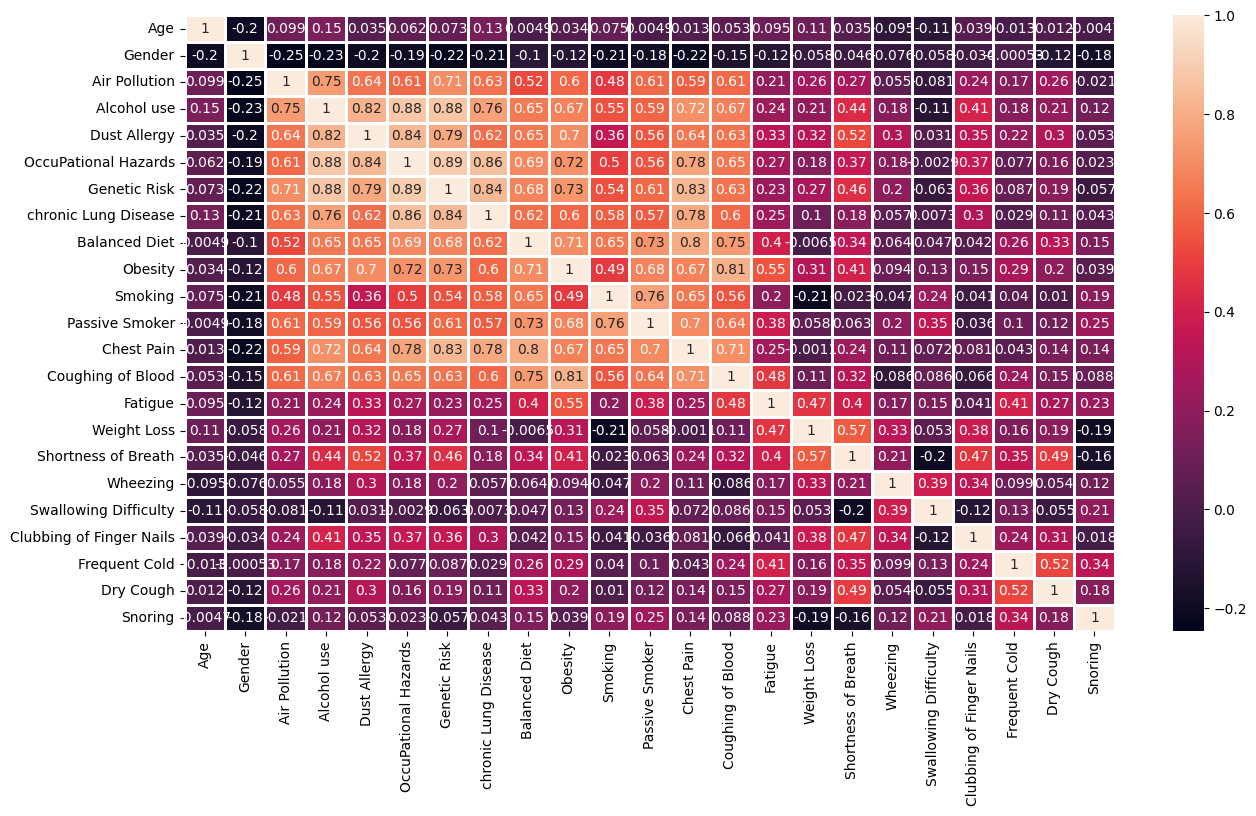

In [ ]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.select_dtypes(include="number").corr(),linewidth = 1, annot = True)

<Axes: xlabel='Level', ylabel='count'>

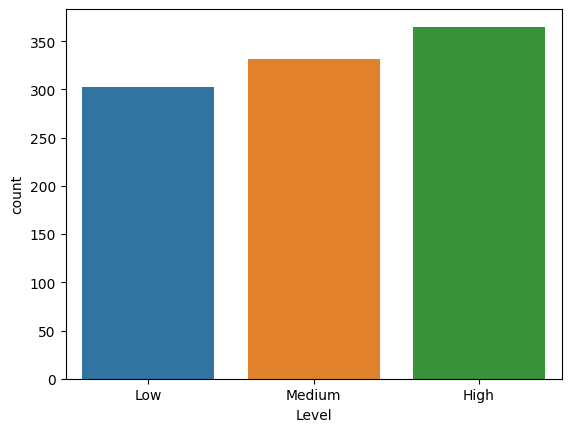

In [ ]:
sns.countplot(data = df, x ='Level' )

<Axes: xlabel='Level', ylabel='count'>

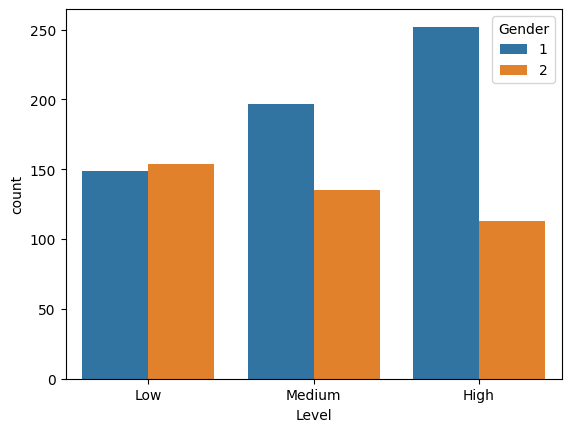

In [ ]:
sns.countplot(data = df, x ='Level', hue = 'Gender' )

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df['Gender'].value_counts()


1    598
2    402
Name: Gender, dtype: int64

In [ ]:
df['Smoking'].value_counts()


2    222
7    207
1    181
3    172
8     89
6     60
4     59
5     10
Name: Smoking, dtype: int64

In [ ]:
df['Genetic Risk'].value_counts()


7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: Genetic Risk, dtype: int64

In [ ]:
df['chronic Lung Disease'].value_counts()


6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronic Lung Disease, dtype: int64

In [ ]:
df['Air Pollution'].value_counts()


6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: Air Pollution, dtype: int64

In [ ]:
df['Coughing of Blood'].value_counts()


7    187
4    172
3    171
2    121
8    119
1     71
9     60
5     50
6     49
Name: Coughing of Blood, dtype: int64

In [ ]:
df['Chest Pain'].value_counts()


7    296
4    191
2    181
3    153
1     80
6     40
8     30
9     19
5     10
Name: Chest Pain, dtype: int64

In [ ]:
selected_columns = ['Age', 'Gender', 'Smoking', 'Genetic Risk', 'chronic Lung Disease', 'Air Pollution', 'Coughing of Blood', 'Chest Pain','Level']


df = df[selected_columns]

In [ ]:
df

,Age,Gender,Smoking,Genetic Risk,chronic Lung Disease,Air Pollution,Coughing of Blood,Chest Pain,Level
0,33,1,3,3,2,2,4,2,Low
1,17,1,2,4,2,3,3,2,Medium
2,35,1,2,5,4,4,8,4,High
3,37,1,7,6,7,7,8,7,High
4,46,1,8,7,6,6,9,7,High
...,...,...,...,...,...,...,...,...,...
995,44,1,7,7,6,6,7,7,High
996,37,2,7,7,6,6,7,7,High
997,25,2,2,5,4,4,8,4,High
998,18,2,8,7,6,6,9,7,High


In [ ]:
X = df[['Age', 'Gender', 'Smoking', 'Genetic Risk', 'chronic Lung Disease', 'Air Pollution', 'Coughing of Blood', 'Chest Pain']]
Y = df['Level']

In [ ]:
# Replace values in the 'Level' column
df['Level'] = df['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2})


In [ ]:
Y = df['Level']
Y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.28546344,  1.21522845, -0.77601748, ...,  0.05346758,
         1.28934514, -0.19545735],
       [ 1.2033842 , -0.82289054,  1.21888607, ..., -0.43818832,
        -1.59878798, -1.51685915],
       [-1.58730983,  1.21522845,  1.61786678, ...,  1.03677939,
         1.70193559,  1.12594445],
       ...,
       [-1.25899289, -0.82289054, -1.17499819, ...,  1.03677939,
        -0.77360709, -0.19545735],
       [-0.02780434, -0.82289054,  1.21888607, ...,  1.52843529,
         1.28934514,  1.12594445],
       [-0.10988358, -0.82289054,  1.21888607, ...,  1.03677939,
         0.8767547 ,  1.12594445]])

In [ ]:
X_test

array([[-0.02780434,  1.21522845,  1.21888607, ...,  1.52843529,
         1.28934514,  1.12594445],
       [ 0.87506726,  1.21522845, -1.17499819, ...,  1.03677939,
        -0.77360709, -0.19545735],
       [-1.17691365, -0.82289054, -0.77601748, ..., -0.43818832,
        -0.77360709, -0.63592462],
       ...,
       [-0.93067594,  1.21522845,  1.21888607, ...,  1.52843529,
         0.8767547 ,  1.12594445],
       [-1.50523059, -0.82289054,  1.21888607, ...,  1.03677939,
         0.8767547 ,  1.12594445],
       [ 0.62882955,  1.21522845,  0.81990536, ..., -1.42150013,
        -1.18619753,  1.12594445]])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
classifier = Sequential()

classifier = Sequential()

# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu', input_dim=X_train.shape[1]))

# Adding the second Hidden layer
classifier.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
54/54 [==============================] - 0s 4ms/step - loss: -7155.6870 - accuracy: 0.4832 - val_loss: -6576.0493 - val_accuracy: 0.4583
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: -7337.9141 - accuracy: 0.4851 - val_loss: -6735.7891 - val_accuracy: 0.4697
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: -7522.4741 - accuracy: 0.4646 - val_loss: -6907.2915 - val_accuracy: 0.4583
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: -7710.9409 - accuracy: 0.4739 - val_loss: -7079.4453 - val_accuracy: 0.4470
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: -7902.4028 - accuracy: 0.4813 - val_loss: -7247.9702 - val_accuracy: 0.4697
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: -8095.0186 - accuracy: 0.4888 - val_loss: -7431.4272 - val_accuracy: 0.4508
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: -8289.4785 - accuracy: 0.4795 - v

In [ ]:
age = float(input("Enter Your Age: "))
Gender = float(input("Enter Your Gender: "))
Smoking = float(input("Enter Your Smoking Level: "))
Genetic = float(input("Enter Your Genetic Risk Level: "))
Chronic = float(input("Enter Your Chronic Lung Disease Level: "))
Air_Pollution = float(input("Enter Air Pollution Level: "))
Coughing_of_Blood_Level = float(input("Enter Your Coughing of Blood Level: "))
Chest_Pain_Level = float(input("Enter Your Chest Pain Level: "))

# Provide values for all 8 features in user input
user_input = np.array([[age, Gender, Smoking, Genetic, Chronic, Air_Pollution, Coughing_of_Blood_Level, Chest_Pain_Level]])

result = classifier.predict(user_input)[0, 0]

if result==0:
  print('Predicted Lung Cancer is : Low Level')
elif result==1:
  print('Predicted Lung Cancer is :medium Level')
else:
  print('Predicted Lung Cancer is : High Level')


Enter Your Age: 33
Enter Your Gender: 1
Enter Your Smoking Level: 2
Enter Your Genetic Risk Level: 3
Enter Your Chronic Lung Disease Level: 2
Enter Air Pollution Level: 2
Enter Your Coughing of Blood Level: 4
Enter Your Chest Pain Level: 2
1/1 [==============================] - 0s 22ms/step
Predicted Lung Cancer is :medium Level


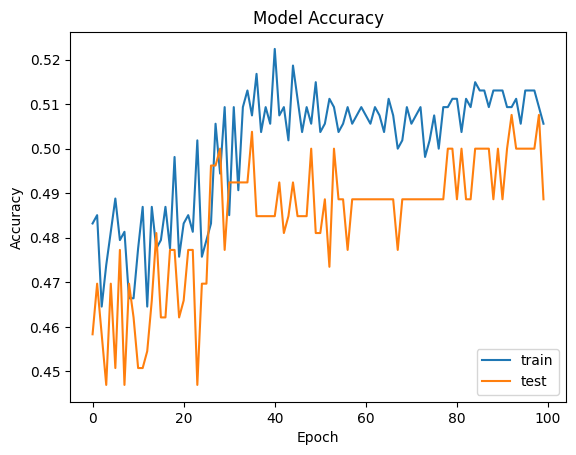

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

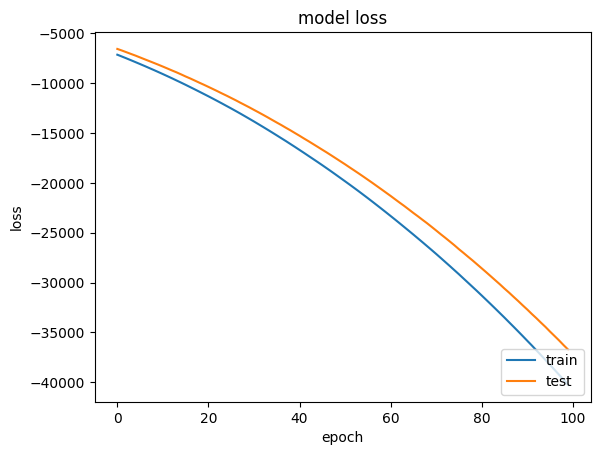

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
